## Loading Data 

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
# Models & evaluation metrics
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import joblib
import shap
from lime.lime_tabular import LimeTabularExplainer
# setting random state for reproducibility
SEED = 321
np.random.seed(SEED)




In [49]:
loaded = joblib.load('linereg_and_rf.joblib')
loaded.keys()

dict_keys(['preprocessor', 'X_train', 'y_train', 'X_test', 'y_test', 'LinearRegression', 'RandomForest'])

In [50]:
preprocessor= loaded['preprocessor']
X_train_df= loaded['X_train']
y_train= loaded['y_train']
X_test_df= loaded['X_test']
y_test= loaded['y_test']
lr= loaded['LinearRegression']
rf= loaded['RandomForest']


# SHAP

In [51]:
shap.initjs()

In [52]:
X_shap= shap.sample(X_train_df, nsamples=200, random_state=SEED)
X_shap

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4469,7.720000,0.074669,76.3986,1987.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4438,5.110000,0.034868,163.8210,2004.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
366,8.050000,0.078386,256.4646,2004.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2219,8.760000,0.050131,128.3336,1999.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6080,6.590000,0.176748,82.7908,1998.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7261,7.810000,0.067837,246.1486,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7617,12.822634,0.036214,92.5488,1985.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
534,13.350000,0.140241,150.2392,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1142,12.822634,0.014019,178.1344,1985.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [53]:
y_shap= y_train.loc[X_shap.index]
y_shap

4469    1402.1748
4438    2120.5730
366     5153.2920
2219    2556.6720
6080      83.8908
          ...    
7261    5375.6692
7617    2625.9152
534     2684.5056
1142    3747.1224
2841    5851.0504
Name: Item_Outlet_Sales, Length: 200, dtype: float64

In [54]:
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)


In [55]:
# Model Explainer
explainer= shap.Explainer(rf)
explainer

### Shap Values

In [56]:
shap_values= explainer(X_shap,y_shap)
shap_values.shape

(200, 43)

In [57]:
X_shap.shape

(200, 43)

### Summary Plot 1

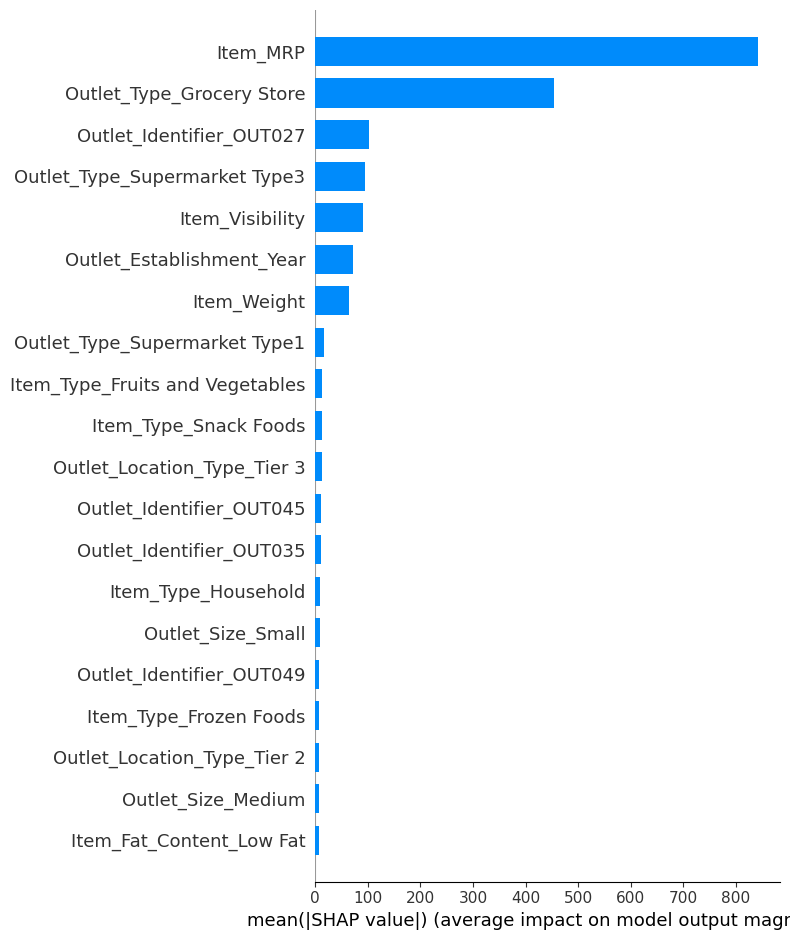

In [58]:
shap.summary_plot(shap_values,X_shap, plot_type='bar');

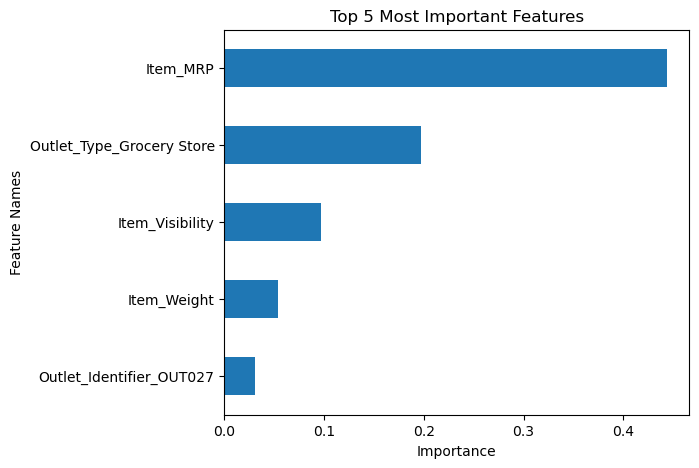

**Comparing our most important features according shap vs. orginal feature importance**

- SHAP top 5
    - item_mrp
    - outlet_type_grocery store
    - outlet_identifier_OUT027
    - outlet_type_supermarket type3
    - item_visibility 
- Orginal top 5
    - item_mrp
    - outlet_type_grocery store
    - item_visibility
    - item_weight
    - outlet_identifier_OUT027


- we see a some similarities.
- both have item_mrp & outlet_type_grocery store are the 1 & 2 most important features. 
- both have item_visibility and outlet_identifier_OUT027 in their top 5, but in different spots.
    - shap
        - outlet_identifier_OUT027 is 3rd
        - item_visibility is 5th
    - orginal
        - outlet_identifier_OUT027 is 5th
        - item_visibility is 3rd
- the differences is shap has outlet_type_supermarket type3 in its top 5, while the orginal has item_weight in its top 5. 

### Summary Plot 2

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


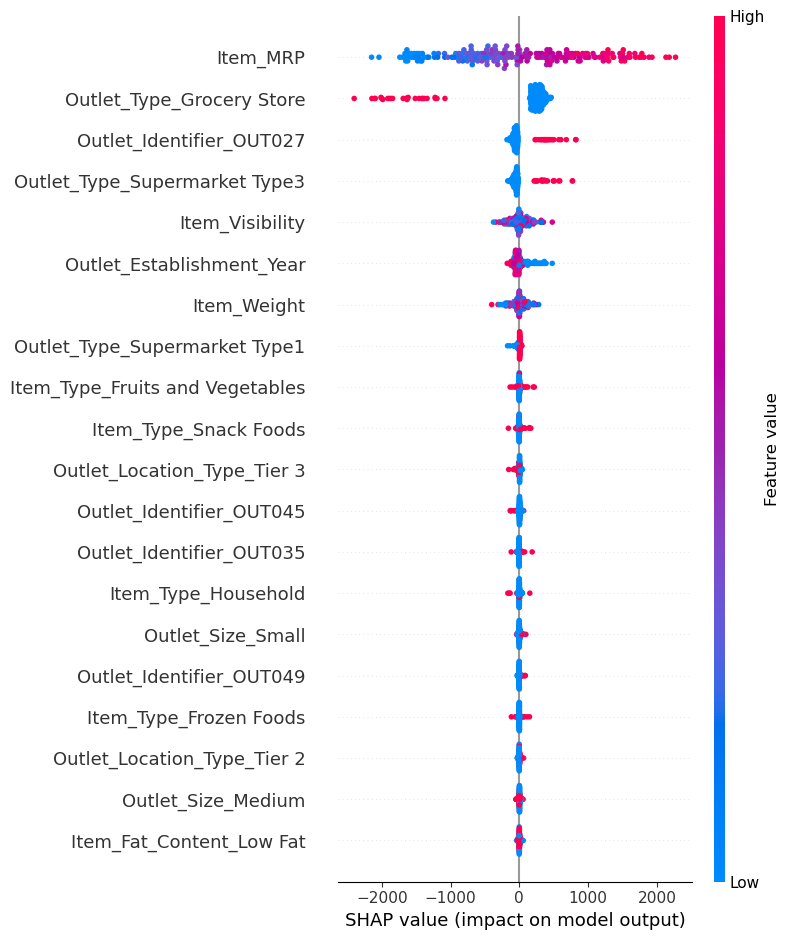

In [59]:
shap.summary_plot(shap_values, X_shap, plot_type='dot');

**Top 3 Features Observations**

Red Dots= Higher Values

Blue Dots= Lower Values

- item_mrp
    - most important feature
    - the red dots(higher values) are on the positive side, so item_mrp helps in the increase of item outlet sales. 
    

- Outlet_Type_Grocery Store
    - the red dots for this feature are clearly on the negative side. This has a negative effect on our target. 
    - so grocery stores decrease our item outlet sales. 
    
    
- Outlet_Identifier_OUT027
    - We have positive red dots for this feature(positive effect). 
    - This store ID increases our item outlet sales. 

# Local Explanations

### Selecting Examples

- Examples: **Outlet_Types**
    - Grocery Stores
    - Type3 Supermarkets

    
- Grocery Stores have our lowest sells while Type3 Supermarkets have the highest. 
- Lets see what other features contribute to these results. 

**Grocery Stores**

In [60]:
filt_grocery= X_shap['Outlet_Type_Grocery Store']== 1
filt_grocery

0      False
1      False
2      False
3      False
4       True
       ...  
195    False
196    False
197    False
198    False
199    False
Name: Outlet_Type_Grocery Store, Length: 200, dtype: bool

In [61]:
len(X_shap[filt_grocery])

26

- We have 26 grocery stores. 

In [62]:
idx_ex_grocery= X_shap[filt_grocery].index
idx_ex_grocery

Int64Index([  4,  12,  13,  17,  21,  42,  50,  61,  70,  76,  77,  91,  98,
            112, 114, 115, 121, 122, 143, 145, 147, 148, 149, 153, 163, 178],
           dtype='int64')

In [65]:
#gs= np.random.choice(idx_ex_grocery)
gs

153

In [66]:
gs= 153
ex_grocery= X_shap.loc[gs]
ex_grocery

Item_Weight                          10.300000
Item_Visibility                       0.018623
Item_MRP                             87.854000
Outlet_Establishment_Year          1998.000000
Item_Fat_Content_Low Fat              0.000000
Item_Fat_Content_Regular              1.000000
Item_Type_Baking Goods                0.000000
Item_Type_Breads                      0.000000
Item_Type_Breakfast                   0.000000
Item_Type_Canned                      0.000000
Item_Type_Dairy                       0.000000
Item_Type_Frozen Foods                0.000000
Item_Type_Fruits and Vegetables       0.000000
Item_Type_Hard Drinks                 0.000000
Item_Type_Health and Hygiene          0.000000
Item_Type_Household                   0.000000
Item_Type_Meat                        0.000000
Item_Type_Others                      0.000000
Item_Type_Seafood                     0.000000
Item_Type_Snack Foods                 1.000000
Item_Type_Soft Drinks                 0.000000
Item_Type_Sta

**Super Market Type3**

In [67]:
filt_market= X_shap['Outlet_Type_Supermarket Type3']== 1
filt_market

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196     True
197    False
198     True
199    False
Name: Outlet_Type_Supermarket Type3, Length: 200, dtype: bool

In [68]:
len(X_shap[filt_market])

21

- We have 21 Type3 Super Markets.

In [69]:
idx_ex_market= X_shap[filt_market].index
idx_ex_market

Int64Index([ 22,  36,  49,  57,  63,  73,  80,  95,  97, 108, 118, 128, 131,
            138, 141, 154, 155, 170, 190, 196, 198],
           dtype='int64')

In [70]:
#sm= np.random.choice(idx_ex_market)
sm

198

In [71]:
sm= 198
ex_market= X_shap.loc[sm]
ex_market

Item_Weight                          12.822634
Item_Visibility                       0.014019
Item_MRP                            178.134400
Outlet_Establishment_Year          1985.000000
Item_Fat_Content_Low Fat              0.000000
Item_Fat_Content_Regular              1.000000
Item_Type_Baking Goods                0.000000
Item_Type_Breads                      0.000000
Item_Type_Breakfast                   0.000000
Item_Type_Canned                      0.000000
Item_Type_Dairy                       0.000000
Item_Type_Frozen Foods                1.000000
Item_Type_Fruits and Vegetables       0.000000
Item_Type_Hard Drinks                 0.000000
Item_Type_Health and Hygiene          0.000000
Item_Type_Household                   0.000000
Item_Type_Meat                        0.000000
Item_Type_Others                      0.000000
Item_Type_Seafood                     0.000000
Item_Type_Snack Foods                 0.000000
Item_Type_Soft Drinks                 0.000000
Item_Type_Sta

### LIME

**Grocery Stores**

In [72]:
lime_explainer= LimeTabularExplainer(training_data=X_shap.values,
                                    feature_names=X_shap.columns, mode='regression')
lime_explainer

In [73]:
exp = lime_explainer.explain_instance(X_shap.loc[gs],
                               rf.predict)
exp.show_in_notebook();

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


- Outlet_Type_Grocery Store most influenced by:
    - Outlet_Type_GroceryStore, Item_MRP,Outlet_Identifier_OUT027, Outlet_Type_SuperMarket Type3, and Item_Type_Seafood(All Negative).
    - We have 1 feature that is positive, but it is definitely outweighed by negatives.

In [74]:
y_shap.loc[gs]

259.662

**Super Market Type3**

In [75]:
exp1 = lime_explainer.explain_instance(X_shap.loc[sm],
                               rf.predict)
exp1.show_in_notebook();

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


- Outlet_Type_Supermarket Type3 most influenced by:
    - Outlet_type_Grocery Store, Outlet_Identifier_OUT027, Outlet_Type_Supermarket Type3, Item_MRP, and Item_Type_Starchy Foods.
    - We have 3 negative features, but are outweighed by the positives. 

In [76]:
y_shap.loc[sm]

3747.1224

### Individual Force Plot

**Grocery Store**

In [77]:
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[gs].values,
               features=X_shap.iloc[gs])

- The Features, Outlet_Type_Grocery Store and Item_MRP most influence the predictions. 

**SuperMarket Type3**

In [78]:
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[sm].values,
               features=X_shap.iloc[sm])

- The Features, Outlet_Establishment_Year,Outlet_Type_Grocery Store, Outlet_Type_Supermarket Type3, Outlet_Identifier_OUT027, and Item_MRP most influence the predictions. 